<a href="https://colab.research.google.com/github/saiku122/AIJobcolle/blob/master/DeepLearning/%E8%AC%9B%E7%BE%A9%E3%82%B3%E3%83%BC%E3%83%89%E6%A8%A1%E5%86%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/bac

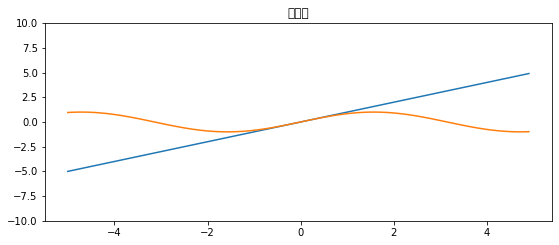

In [ ]:
n_cols=2
n_rows=2

plt.figure(figsize=(20,8))

x=np.arange(-5,5,0.1)

y1=x
plt.subplot(n_rows,n_cols,1)
plt.title('x')
plt.ylim(-10,10);
plt.plot(x,y1)

y2=np.sin(x)
plt.subplot(n_rows,n_cols,1)
plt.title('グラフ')
plt.ylim(-10,10);
plt.plot(x,y2)
plt.show()

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import numpy as np
import time
import matplotlib.pyplot as plt


In [14]:
#データ読みこみ
(x_train,y_train),(x_test,y_test)=mnist.load_data()

print(x_train.shape)
print(y_train.shape)

#データ数
m_train, m_test = x_train.shape[0], x_test.shape[0]

batch_size = 128
n_classes = 10
epochs = 10

# ベクトル化
x_train = x_train.reshape(60000,28*28)
print('reshape x_train:', x_train.shape)
x_test = x_test.reshape(-1,28*28) #列は28*28の値になる、行数は「-1」とすることでもとの値から推測させている
print('reshape x_test:',x_test.shape)


# 標準化
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# yをOneHotVector化(10クラスにわけて0 or 1に整形しなおしている)
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)



(60000, 28, 28)
(60000,)
reshape x_train: (60000, 784)
reshape x_test: (10000, 784)


# ディープラーニング（ニューラルネットワーク）
入力層：784ユニット（28×28）  
第1層：768ユニット　ReLU  
第2層：192ユニット　ReLU  
第3層：10ユニット　Softmax　出力層

In [15]:
#モデル
print(x_train.shape)

model = Sequential()
model.add(Dense(768, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(192, activation="relu"))
model.add(Dense(10, activation="softmax"))

# コンパイル
model.compile(optimizer='sgd',  #確率的勾配降下法で学習
              loss="categorical_crossentropy", #損失関数はクロスエントリピー
              metrics=["accuracy"]) #accuracyで判断
# サマリ
model.summary()
# フィット
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size,
                    verbose = 1,
                    epochs=epochs,
                    validation_data=(x_test,y_test)
                    )

(60000, 784)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 768)               602880    
_________________________________________________________________
dense_4 (Dense)              (None, 192)               147648    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1930      
Total params: 752,458
Trainable params: 752,458
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 1.5164 - accuracy: 0.6274 - val_loss: 0.4888 - val_accuracy: 0.8827
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.4670 - accuracy: 0.8810 - val_loss: 0.3561 - val_accuracy: 0.9046
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.35

KeyError: ignored

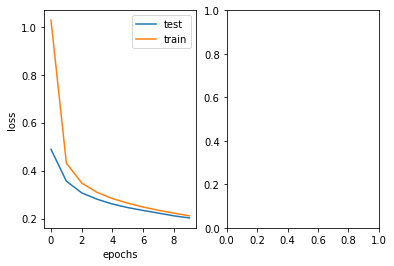

In [17]:
plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], label='test')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
#plt.plot(history.history['val_acc'], label='test')
plt.plot(history.history['acc'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

CNN（畳み込みニューラルネットワーク）  
入力層：784ユニット（28×28）  
畳み込み層：×10　kernel=3, stride=1 / [30x30x10]  
活性化層　ReLU  
プーリング層　×10　kernel=3, stride=3 / [10x10x10]  
畳み込み層：×20　kernel=3, stride=1 / [8x8x20]  
活性化層　ReLU  
バッチ標準化  
全結合層：1280ユニット  
出力層：10ユニット　SoftMax  


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten, BatchNormalization

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 10)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 20)          1820      
_________________________________________________________________
activation_7 (Activation)    (None, 6, 6, 20)          0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 6, 6, 20)         

KeyError: ignored

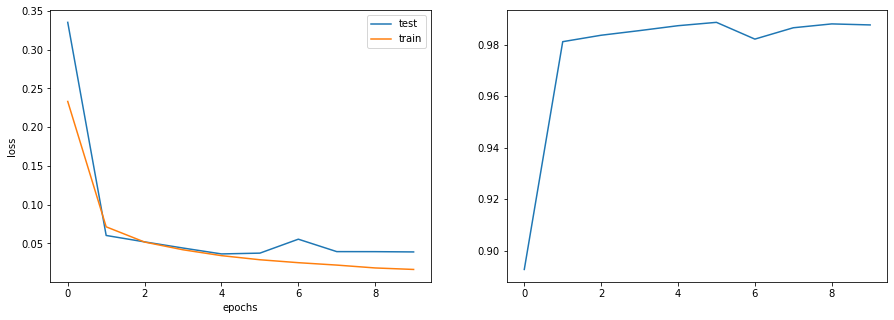

In [22]:
x_train = x_train.reshape(m_train, 28, 28, 1)
x_test = x_test.reshape(m_test, 28, 28, 1)


# モデル
# CONV -> RELU -> MAXPOOL
model = Sequential()
model.add(Conv2D(10, (3, 3), strides=(1, 1), input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=3))
model.add(MaxPool2D((3, 3)))

# CONV -> RELU -> BN -> Flatten
model.add(Conv2D(20, (3, 3), strides=(1, 1)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=3))
model.add(Flatten())

# Softmax
model.add(Dense(10, activation="softmax"))

# コンパイル
model.compile(optimizer='Adam', 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

# サマリ
model.summary()

# フィット
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size,
                    verbose = 1,
                    epochs=epochs,
                    validation_data=(x_test,y_test)
                    )
print(history.history.keys())

fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], label='test')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['val_accuracy'], label='test')
plt.plot(history.history['acc'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')